In [1]:
# general tools
import sys
from glob import glob
from os.path import basename
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# graph tools
import matplotlib.pyplot as plt
%matplotlib inline

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
import data_utils as du
from namelist import * 

In [2]:
sea = 'jja' # testing in the JJA season
N_input = 3 # LR T2, HR elev, LR elev
VAR = 'TMEAN'

In [9]:
hist_path1 = temp_dir+'STRANS_LOSS_{}_{}.npy'.format(VAR, sea)
#hist_path2 = temp_dir+'SN_LOSS_{}_{}_tune1.npy'.format(VAR, sea)
#hist_path3 = temp_dir+'NEO_LOSS_{}_{}_tune2.npy'.format(VAR, sea)

In [10]:
LOSS1 = np.load(hist_path1, allow_pickle=True)[()]
#LOSS2 = np.load(hist_path2, allow_pickle=True)[()]
# LOSS3 = np.load(hist_path3, allow_pickle=True)[()]

In [11]:
V_LOSS = LOSS1['V_LOSS'][:]
V_LOSS_TRANS = LOSS1['V_LOSS_TRANS'][:]
G_LOSS = LOSS1['GAN_LOSS'][:, 1]
D_LOSS = LOSS1['GAN_LOSS'][:, 2]


# V_LOSS = np.concatenate((LOSS1['V_LOSS'][:], LOSS2['V_LOSS'][:]), axis=0)
# V_LOSS_TRANS = np.concatenate((LOSS1['V_LOSS_TRANS'][:], LOSS2['V_LOSS_TRANS'][:]), axis=0)
# G_LOSS = np.concatenate((LOSS1['GAN_LOSS'][:, 1], LOSS2['GAN_LOSS'][:, 1]), axis=0)
# D_LOSS = np.concatenate((LOSS1['GAN_LOSS'][:, 2], LOSS2['GAN_LOSS'][:, 2]), axis=0)

In [12]:
epochs = len(V_LOSS)
batchs = len(G_LOSS)

te = np.arange(epochs)
tb = np.linspace(0, epochs-1, batchs)

(0.01, 0.3)

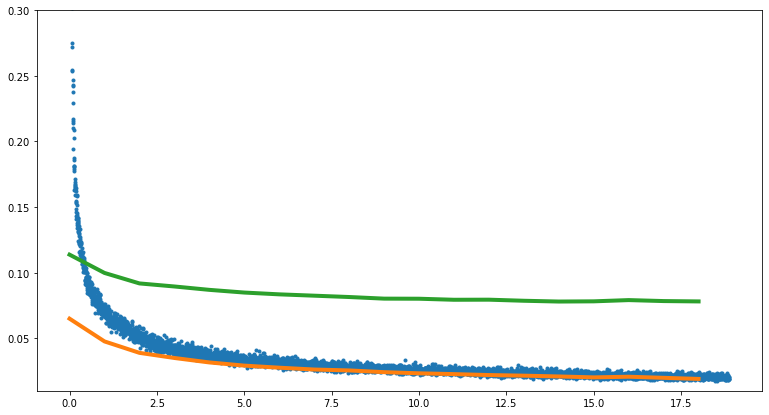

In [13]:
plt.figure(figsize=(13, 7))
plt.plot(tb, G_LOSS, '.')
plt.plot(te, V_LOSS, lw=4)
plt.plot(te, V_LOSS_TRANS, lw=4)
#plt.axhline(0.07, linestyle='--', color='k', linewidth='3')
plt.ylim([0.01, 0.3])

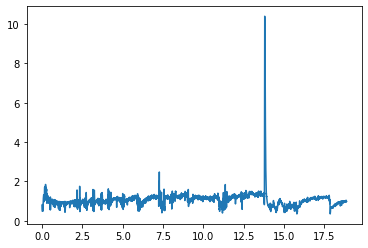

In [14]:
plt.plot(tb, D_LOSS)

In [3]:
hist_path1 = temp_dir+'STRANS_LOSS_ELEV_{}.npy'.format(sea)

In [4]:
LOSS1 = np.load(hist_path1, allow_pickle=True)[()]
V_LOSS = LOSS1['V_LOSS'][:]
G_LOSS = LOSS1['GAN_LOSS'][:, 1]
D_LOSS = LOSS1['GAN_LOSS'][:, 2]

In [5]:
epochs = len(V_LOSS)
batchs = len(G_LOSS)

te = np.arange(epochs)
tb = np.linspace(0, epochs-1, batchs)

(0, 0.1)

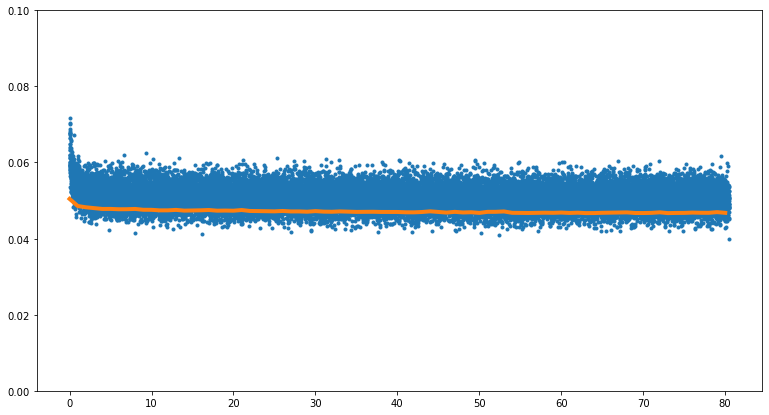

In [7]:
plt.figure(figsize=(13, 7))
plt.plot(tb, G_LOSS, '.')
plt.plot(te, V_LOSS, lw=4)
plt.ylim([0, 0.1])

In [33]:
file_path = BATCH_dir
print('TORI:{} TSUB:{} VORI:{} VSUB:{}'.format(len(glob(file_path+'TMEAN_BATCH_96_TORI_*{}*.npy'.format(sea))),
len(glob(file_path+'TMEAN_BATCH_96_TSUB_*{}*.npy'.format(sea))),
len(glob(file_path+'TMEAN_BATCH_96_VORI_*{}*.npy'.format(sea))),
len(glob(file_path+'TMEAN_BATCH_96_VSUB_*{}*.npy'.format(sea)))))

TORI:340 TSUB:59 VORI:113 VSUB:19
